In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
training_examples = [
    ((0, 2), 1),
    ((-2, 0), 1),
    ((1, -1), -1),
    ((1, 2), -1),
    ((3, -7), 1),
]

def phi(x):
    return np.array(x)

def initial_weights():
    return np.zeros(2)

def hingeLoss(w):
    return 1.0/len(training_examples) * sum(np.max(1.0 - w.dot(phi(x))*y, 0) for x, y in training_examples)

# print(hingeLoss(np.array([0.5, 1.0])))
def gradientHingeLoss(w):
    return 1.0/len(training_examples) * sum(-phi(x)*y if (1.0 - w.dot(phi(x))*y) > 0 else 0 for x, y in training_examples)

initialW = initial_weights()
# gradientHingeLoss(np.array([0.5, 1.0]))
# this should give, (1, -0.33)


In [25]:
def gradientDescent(F, gradF, initialW):
    w = initialW
    eta = 0.01
    epochs = 200
    for T in range(epochs):
        loss = F(w)
        w = w - eta*gradF(w)
        # print(f"LOSS: {loss}")
    return w

gradientDescent(hingeLoss, gradientHingeLoss, initialW)

array([-0.5  , -0.366])

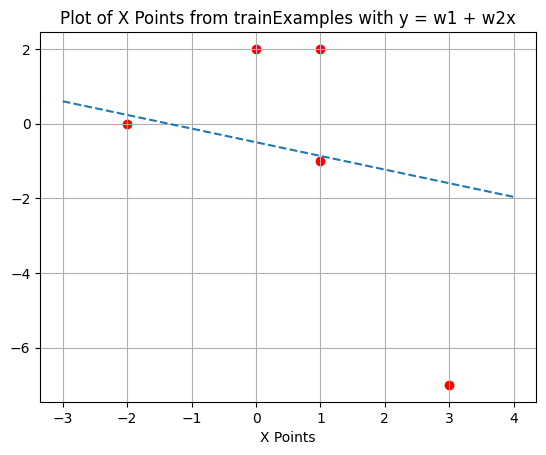

In [26]:
x_points = [ex[0][0] for ex in training_examples]
y_points = [ex[0][1] for ex in training_examples]

w1, w2 = gradientDescent(hingeLoss, gradientHingeLoss, initialW)

line_x = np.linspace(min(x_points)-1, max(x_points)+1, 100)
line_y = w1 + w2*line_x

plt.plot(line_x, line_y, label=f'y = {w1} + {w2}x', linestyle='--')
plt.scatter(x_points, y_points, c='r', marker='o', label='x points')

# Set labels and title
plt.xlabel('X Points')
plt.title('Plot of X Points from trainExamples with y = w1 + w2x')

# Show plot
plt.grid(True)
plt.show()
